In [2]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
def select_column(column_name: str) -> pd.DataFrame:
    # Connect to the SQLite database
    conn = sqlite3.connect('/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/new.db')

    # Query to extract relevant records
    query = f"""
    SELECT workflow, failure_type, overhead/(task_count*0.3) AS overhead_per_task
    FROM workflow 
    WHERE makespan IS NOT NULL
    AND workflow_finish IS 1
    AND resilience IS 1
    AND node_cnt IS 32
    AND failure_rate_set IS 0.1;
    """

    # Load data into a DataFrame
    df = pd.read_sql_query(query, conn)
    df = df.sort_values(by=['failure_type', 'workflow'])

    # Close the database connection
    conn.close()

    return df


In [4]:
# x-axis: workflow, y-axis: average overhead per task of each workflow
def plot_overhead_per_task_per_workflow():
    df = select_column('overhead_per_task')
    
    # Ensure the 'overhead_per_task' column is of numeric type
    df['overhead_per_task'] = pd.to_numeric(df['overhead_per_task'], errors='coerce')
    
    # Select only numeric columns for aggregation
    numeric_cols = df.select_dtypes(include=['number']).columns
    df = df.groupby(['workflow'])[numeric_cols].mean().reset_index()

    sns.set_theme()
    sns.set_palette("pastel")
    # sns.set_context("paper", font_scale=1.5)
    sns.set_style("whitegrid")

    plt.figure(figsize=(4, 3))
    plt.tight_layout()

    # Create the bar plot
    ax = sns.barplot(data=df, x='workflow', y='overhead_per_task', ci=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)

    plt.xlabel('Workflow', fontsize=10)
    plt.ylabel('Overhead per Task', fontsize=10)
    plt.tight_layout()
    # plt.savefig(f'/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/img/success_overhead_per_task.pdf', bbox_inches='tight')
    plt.show()


/tmp/ipykernel_458219/696539493.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_mean, x='workflow', y='overhead_per_task', ci=None)
/tmp/ipykernel_458219/696539493.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


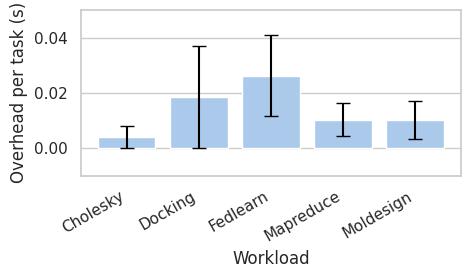

In [5]:
# x-axis: workflow, y-axis: average overhead per task of each workflow
def plot_overhead_per_task_per_workflow():
    df = select_column('overhead_per_task')
    
    # Ensure the 'overhead_per_task' column is of numeric type
    df['overhead_per_task'] = pd.to_numeric(df['overhead_per_task'], errors='coerce')
    
    # Select only numeric columns for aggregation
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_mean = df.groupby(['workflow'])[numeric_cols].mean().reset_index()
    df_sem = df.groupby(['workflow'])[numeric_cols].sem().reset_index()

    # Convert workflow names to uppercase
    df_mean['workflow'] = df_mean['workflow'].str.title()
    df_sem['workflow'] = df_sem['workflow'].str.title()

    plt.rc('font', size=10)  # 控制默认文本的大小
    plt.rc('axes', titlesize=10)  # 控制标题的大小
    plt.rc('axes', labelsize=10)  # 控制x轴和y轴标签的大小
    plt.rc('xtick', labelsize=10)  # 控制x轴刻度的大小
    plt.rc('ytick', labelsize=10)  # 控制y轴刻度的大小
    plt.rc('legend', fontsize=10)  # 控制图例的字体大小

    sns.set_theme()
    sns.set_palette("pastel")
    sns.set_style("whitegrid")

    plt.figure(figsize=(5, 3))
    plt.tight_layout()

    # ax = sns.boxplot(data=df, x='workflow', y='overhead_per_task')

    # Create the bar plot with error bars
    ax = sns.barplot(data=df_mean, x='workflow', y='overhead_per_task', ci=None)
    ax.set_ylim(-0.01, 0.05)
    
    # Add error bars
    for i, workflow in enumerate(df_mean['workflow']):
        mean = df_mean[df_mean['workflow'] == workflow]['overhead_per_task'].values[0]
        sem = df_sem[df_sem['workflow'] == workflow]['overhead_per_task'].values[0]
        ax.errorbar(i, mean, yerr=sem, fmt='none', c='black', capsize=5)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

    plt.xlabel('Workload')
    plt.ylabel('Overhead per task (s)')
    plt.tight_layout()
    plt.savefig(f'/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/img/success_overhead_per_task.pdf', bbox_inches='tight')
    plt.show()

# 示例用法
plot_overhead_per_task_per_workflow()

/tmp/ipykernel_136954/2250577505.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='workflow', y='overhead_per_task', ci=None)
/tmp/ipykernel_136954/2250577505.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)


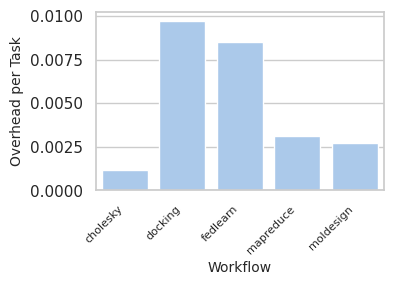

In [6]:
plot_overhead_per_task_per_workflow()

/tmp/ipykernel_405869/3188414950.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'workflow']).apply(calculate_normalized_makespan).reset_index()


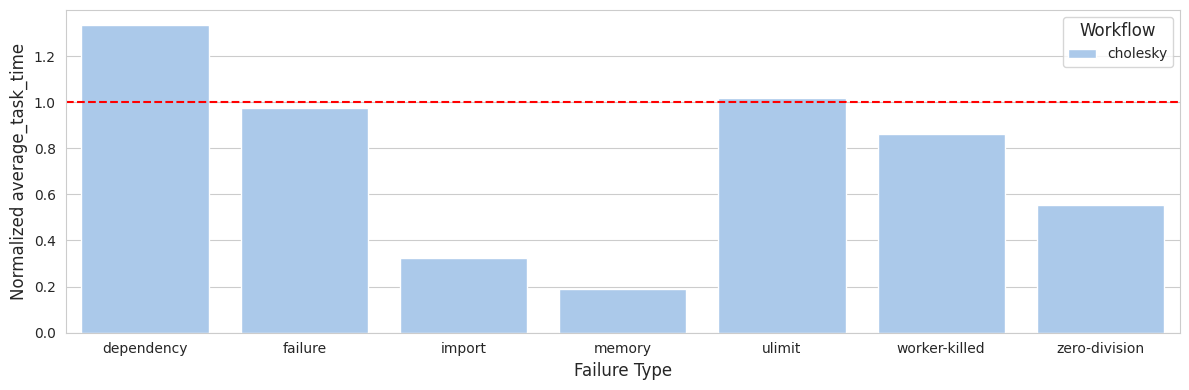

/tmp/ipykernel_405869/3188414950.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'workflow']).apply(calculate_normalized_makespan).reset_index()


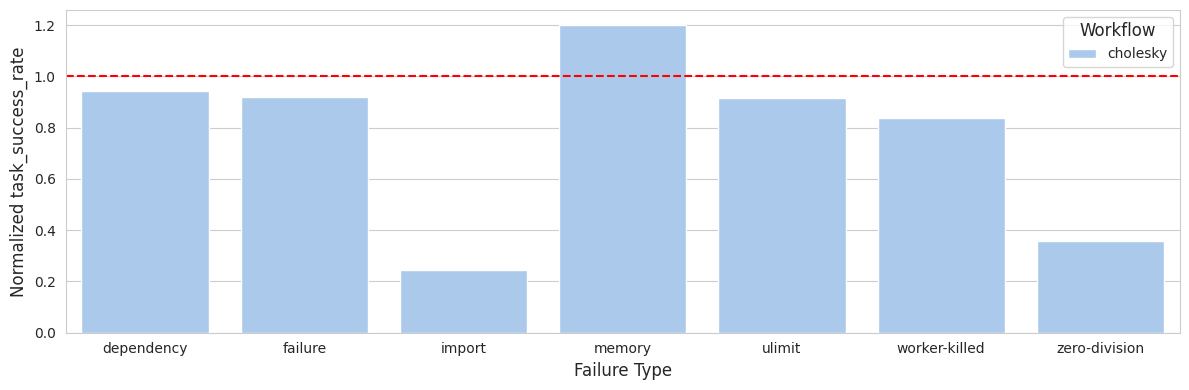

/tmp/ipykernel_405869/3188414950.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'workflow']).apply(calculate_normalized_makespan).reset_index()


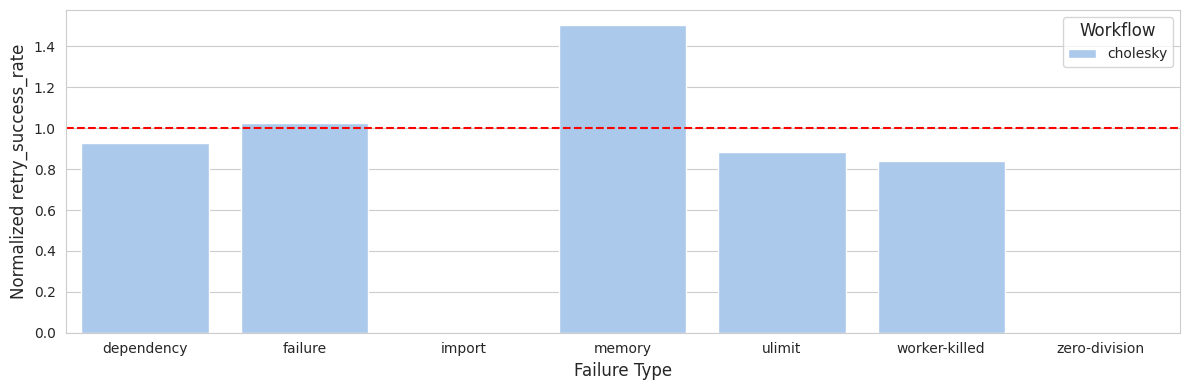

In [6]:
draw_column('average_task_time')
draw_column('task_success_rate')
draw_column('retry_success_rate')
# occur at the same place

In [6]:
def select_column(column_name: str) -> pd.DataFrame:
    # Connect to the SQLite database
    conn = sqlite3.connect('/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/mapreduce_correct.db')

    # Query to extract relevant records
    query = f"""
    SELECT {column_name}, resilience
    FROM workflow 
    WHERE makespan IS NOT NULL
    AND node_cnt IS 3
    AND failure_type IS 'memory';
    """

    # Load data into a DataFrame
    df = pd.read_sql_query(query, conn)
    # df = df.sort_values(by=['failure_type', 'workflow'])

    # Close the database connection
    conn.close()

    return df


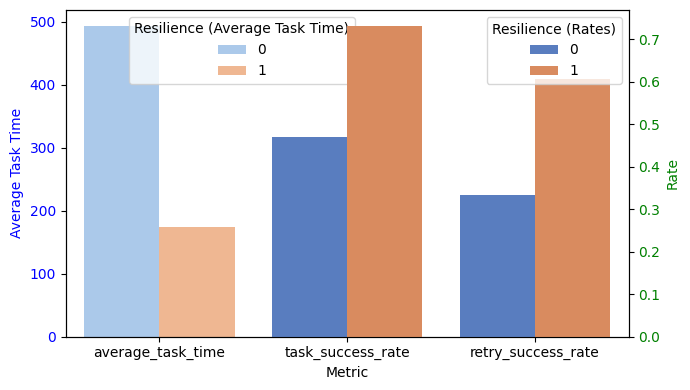

In [18]:
# Get data for each column
df_avg_task_time = select_column('average_task_time')
df_task_success_rate = select_column('task_success_rate')
df_retry_success_rate = select_column('retry_success_rate')

# Group by 'resilience' and calculate the mean for numeric columns
df_avg_task_time = df_avg_task_time.groupby('resilience', as_index=False).mean()
df_task_success_rate = df_task_success_rate.groupby('resilience', as_index=False).mean()
df_retry_success_rate = df_retry_success_rate.groupby('resilience', as_index=False).mean()

# Merge dataframes on 'resilience'
df_merged = df_avg_task_time.merge(df_task_success_rate, on='resilience')
df_merged = df_merged.merge(df_retry_success_rate, on='resilience')

# Melt the dataframe for easier plotting with seaborn
df_melted = df_merged.melt(id_vars='resilience', value_vars=['average_task_time', 'task_success_rate', 'retry_success_rate'], 
                           var_name='Metric', value_name='Value')

# 创建图形和第一个轴对象
fig, ax1 = plt.subplots(figsize=(7, 4))

# 绘制 average_task_time 的柱状图
sns.barplot(x='Metric', y='Value', hue='resilience', data=df_melted[df_melted['Metric'] == 'average_task_time'], palette='pastel', ax=ax1)
ax1.set_xlabel('Metric')
ax1.set_ylabel('Average Task Time', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个轴对象，共享相同的 x 轴
ax2 = ax1.twinx()

# 绘制 task_success_rate 和 retry_success_rate 的柱状图
sns.barplot(x='Metric', y='Value', hue='resilience', data=df_melted[df_melted['Metric'] != 'average_task_time'], palette='muted', ax=ax2)
ax2.set_ylabel('Rate', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# 设置标题和图例
# fig.suptitle('Metrics by Resilience')
ax1.legend(loc='upper left', title='Resilience (Average Task Time)', bbox_to_anchor=(0.1, 1))
ax2.legend(loc='upper right', title='Resilience (Rates)')

plt.tight_layout()
plt.savefig(f'/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/img/executors.pdf', bbox_inches='tight')
plt.show()

In [5]:
# Get data for each column
df_avg_task_time = select_column('average_task_time')
df_task_success_rate = select_column('task_success_rate')
df_retry_success_rate = select_column('retry_success_rate')

# Group by 'workflow' and 'failure_type' and calculate the mean
df_avg_task_time = df_avg_task_time.groupby('resilience').mean().reset_index()
df_task_success_rate = df_task_success_rate.groupby('resilience').mean().reset_index()
df_retry_success_rate = df_retry_success_rate.groupby('resilience').mean().reset_index()

# Merge dataframes on 'workflow' and 'failure_type'
df_merged = df_avg_task_time.merge(df_task_success_rate, on='resilience')
df_merged = df_merged.merge(df_retry_success_rate, on='resilience')

df_merged

,resilience,average_task_time,task_success_rate,retry_success_rate
0,0,161.262649,0.278571,0.000000
1,1,160.390825,0.713810,0.741667
